# Classification Group Project Team 14

## Topic: Reducing Hospital Readmission Rates for Diabetes Patients

### 1. Data Preparation

#### (1) Import Libraries and Load Data

In [1]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
# Load the dataset
data = pd.read_csv('hospital_readmissions.csv')

# Display the first few rows of the dataset
data.head()

/var/folders/7z/tygtw74j3d55_5q18m9rfmmh0000gn/T/ipykernel_18365/73552345.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


#### (2) Explore the Dataset

In [2]:
# Check for basic information, column names, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [3]:
#look at shape of data for each set
data.shape

(25000, 17)

In [4]:
data.describe(include='all')

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8,8,8,3,3,2,2,2
top,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12382,7824,9056,9107,23625,20938,13497,19228,13246
mean,NaN,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### (3) Handling Missing Values

In [5]:
# see what percentage of each column is empty
data.isna().sum() / len(data) * 100

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

#### (4) Converting Categorical Variables to Dummy Variables

In [6]:
# Convert categorical variables to dummy variables
categorical_cols = ['age', 'diag_1',
                    'glucose_test', 'A1Ctest']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

# Confirming all columns are in binary format (should already be 0/1 by default in pandas)
data_encoded = data_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))
data_encoded = data_encoded.applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

# Check data after encoding
data_encoded.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_2,diag_3,...,diag_1_Missing,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,glucose_test_high,glucose_test_no,glucose_test_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal
0,8,72,1,18,2,0,0,Missing,Respiratory,Other,...,0,0,0,0,0,1,0,0,1,0
1,3,34,2,13,0,0,0,Other,Other,Other,...,0,0,1,0,0,1,0,0,1,0
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,...,0,0,0,0,0,1,0,0,1,0
3,2,36,0,12,1,0,0,Missing,Other,Diabetes,...,0,0,0,0,0,1,0,0,1,0
4,1,42,0,7,0,0,0,InternalMedicine,Circulatory,Respiratory,...,0,0,1,0,0,1,0,0,1,0


In [7]:
# Check for basic information, column names, data types, and missing values
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   time_in_hospital        25000 non-null  int64 
 1   n_lab_procedures        25000 non-null  int64 
 2   n_procedures            25000 non-null  int64 
 3   n_medications           25000 non-null  int64 
 4   n_outpatient            25000 non-null  int64 
 5   n_inpatient             25000 non-null  int64 
 6   n_emergency             25000 non-null  int64 
 7   medical_specialty       25000 non-null  object
 8   diag_2                  25000 non-null  object
 9   diag_3                  25000 non-null  object
 10  change                  25000 non-null  int64 
 11  diabetes_med            25000 non-null  int64 
 12  readmitted              25000 non-null  int64 
 13  age_[40-50)             25000 non-null  int64 
 14  age_[50-60)             25000 non-null  int64 
 15  ag

#### (6) Exploratory Data Analysis (EDA) 

In [8]:
data_encoded = data_encoded.drop(['diag_3','diag_2','medical_specialty'], axis=1)

In [9]:
# replace all yesses and nos to be 1 and 0
data_encoded['change'].replace(to_replace=['yes'], value='1', inplace=True)
data_encoded['change'].replace(to_replace=['no'], value='0', inplace=True)

data_encoded['diabetes_med'].replace(to_replace=['yes'], value='1', inplace=True)
data_encoded['diabetes_med'].replace(to_replace=['no'], value='0', inplace=True)

data_encoded['readmitted'].replace(to_replace=['yes'], value='1', inplace=True)
data_encoded['readmitted'].replace(to_replace=['no'], value='0', inplace=True)# create boxplots for categorical variables 


In [10]:
# Display summary statistics for numeric variables
print(data_encoded.describe())

       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency        change  diabetes_med  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean       0.366400      0.615960      0.186600      0.460120      0.769120   
std        1.195478      1.177951      0.885873      0.498417      0.421404   
min        0.0000

In [11]:
# Compute correlations
cormat = data_encoded.corr()

In [12]:
# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

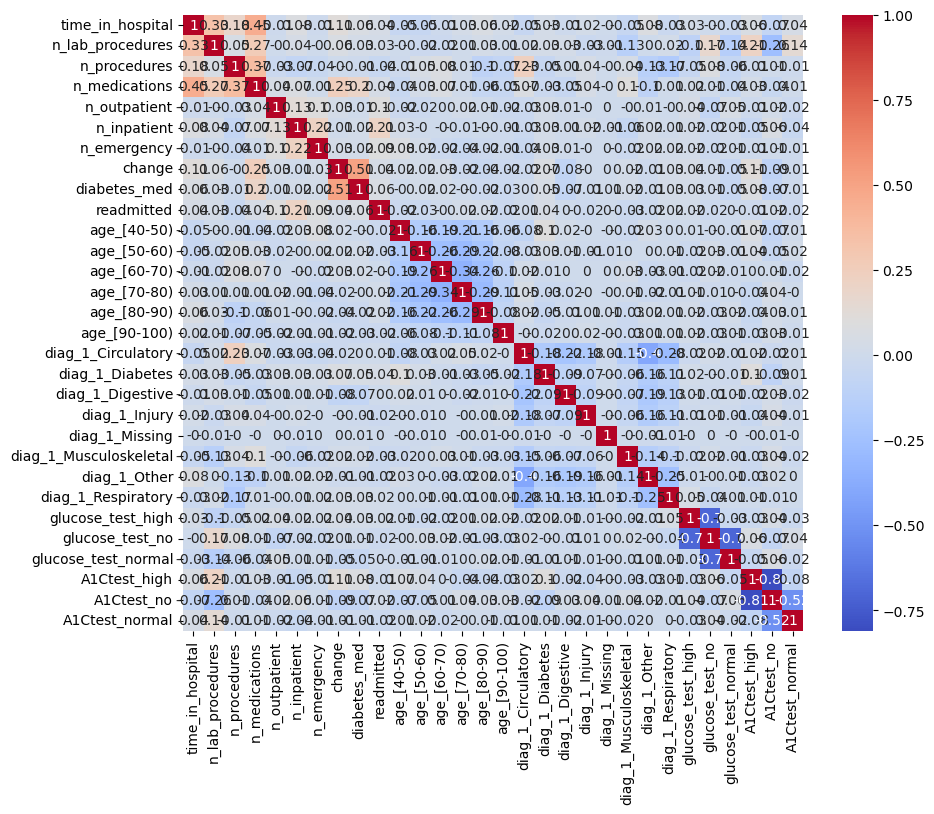

In [13]:
# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

### 2. Model Building

### 2.1 Logistic Regression

In [14]:
df = data
print(df)

           age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0        

In [15]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [16]:
# drop unnecessary columns
df.drop(['medical_specialty', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [17]:
# convert diagnosis variable to numerical (optional)
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == 'yes' else 0)
# Convert response from an integer to a categorical variable
df['readmitted'] = df['readmitted'].astype('category')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Circulatory,no,no,no,yes,0
1,[70-80),3,34,2,13,0,0,0,Other,no,no,no,yes,0
2,[50-60),5,45,0,18,0,0,0,Circulatory,no,no,yes,yes,1
3,[70-80),2,36,0,12,1,0,0,Circulatory,no,no,yes,yes,1
4,[60-70),1,42,0,7,0,0,0,Other,no,no,no,yes,0


In [18]:
df['change'].replace(to_replace=['yes'], value='1', inplace=True)
df['change'].replace(to_replace=['no'], value='0', inplace=True)

df['diabetes_med'].replace(to_replace=['yes'], value='1', inplace=True)
df['diabetes_med'].replace(to_replace=['no'], value='0', inplace=True)

df['readmitted'].replace(to_replace=['yes'], value='1', inplace=True)
df['readmitted'].replace(to_replace=['no'], value='0', inplace=True)# create boxplots for categorical variables 

#### Train Test Split for the full model

In [19]:
# split the data into training and testing sets
X = df.drop(['readmitted'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['n_lab_procedures', 'n_procedures','n_medications','n_outpatient', 'n_inpatient','n_emergency','diag_1','age','glucose_test','A1Ctest','change', 'diabetes_med']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['age', 'diag_1', 'glucose_test','A1Ctest','change', 'diabetes_med'], drop_first=True, dtype='float')

y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4913 to 23654
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n_lab_procedures        17500 non-null  int64  
 1   n_procedures            17500 non-null  int64  
 2   n_medications           17500 non-null  int64  
 3   n_outpatient            17500 non-null  int64  
 4   n_inpatient             17500 non-null  int64  
 5   n_emergency             17500 non-null  int64  
 6   age_[50-60)             17500 non-null  float64
 7   age_[60-70)             17500 non-null  float64
 8   age_[70-80)             17500 non-null  float64
 9   age_[80-90)             17500 non-null  float64
 10  age_[90-100)            17500 non-null  float64
 11  diag_1_Diabetes         17500 non-null  float64
 12  diag_1_Digestive        17500 non-null  float64
 13  diag_1_Injury           17500 non-null  float64
 14  diag_1_Missing          17500 non-null  

#### Full Logistic Regression Model Using statsmodels

In [20]:
X.dtypes

n_lab_procedures            int64
n_procedures                int64
n_medications               int64
n_outpatient                int64
n_inpatient                 int64
n_emergency                 int64
age_[50-60)               float64
age_[60-70)               float64
age_[70-80)               float64
age_[80-90)               float64
age_[90-100)              float64
diag_1_Diabetes           float64
diag_1_Digestive          float64
diag_1_Injury             float64
diag_1_Missing            float64
diag_1_Musculoskeletal    float64
diag_1_Other              float64
diag_1_Respiratory        float64
glucose_test_no           float64
glucose_test_normal       float64
A1Ctest_no                float64
A1Ctest_normal            float64
change_1                  float64
diabetes_med_1            float64
dtype: object

In [21]:
y_train.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [22]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y=y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.657245
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                17500
Model:                          Logit   Df Residuals:                    17475
Method:                           MLE   Df Model:                           24
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                 0.04959
Time:                        11:45:08   Log-Likelihood:                -11502.
converged:                       True   LL-Null:                       -12102.
Covariance Type:            nonrobust   LLR p-value:                2.116e-238
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8819      0.129     -6.848      0.000      -1.134      

#### Evaluate Full Model on Training and Test Set

In [23]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4913 to 23654
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   n_lab_procedures        17500 non-null  int64   
 1   n_procedures            17500 non-null  int64   
 2   n_medications           17500 non-null  int64   
 3   n_outpatient            17500 non-null  int64   
 4   n_inpatient             17500 non-null  int64   
 5   n_emergency             17500 non-null  int64   
 6   age_[50-60)             17500 non-null  float64 
 7   age_[60-70)             17500 non-null  float64 
 8   age_[70-80)             17500 non-null  float64 
 9   age_[80-90)             17500 non-null  float64 
 10  age_[90-100)            17500 non-null  float64 
 11  diag_1_Diabetes         17500 non-null  float64 
 12  diag_1_Digestive        17500 non-null  float64 
 13  diag_1_Injury           17500 non-null  float64 
 14  diag_1_Missing          

#### Generate confusion matrices for training and test sets

In [24]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[7355 4919]
 [1891 3335]]
[[3152 2065]
 [ 848 1435]]


#### Create ROC curves for training and test sets

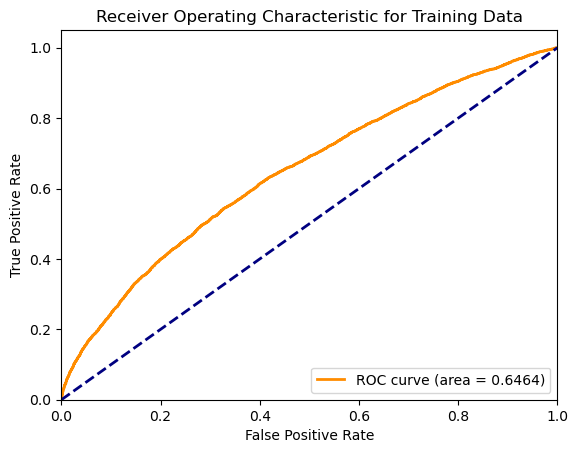

In [25]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


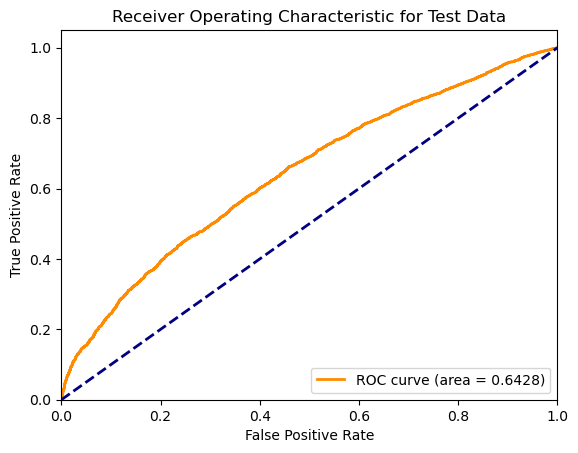

In [26]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


#### Compute Accuracy, Precision, Recall for training and test sets

In [27]:
# calculate the accuracy, precision, and recall scores
acc_train1 = accuracy_score(y_train, psuccess)
prec_train1 = precision_score(y_train, psuccess)
rec_train1 = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train1))
print("Precision (Train): {:.4f}".format(prec_train1))
print("Recall (Train)  : {:.4f}".format(rec_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc_test1 = accuracy_score(y_test, psuccess_test)
prec_test1 = precision_score(y_test, psuccess_test)
rec_test1 = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test1))
print("Precision (Test): {:.4f}".format(prec_test1))
print("Recall (Test)  : {:.4f}".format(rec_test1))
print("")


Accuracy (Train) : 0.6109
Precision (Train): 0.6382
Recall (Train)  : 0.4040

Accuracy (Test) : 0.6116
Precision (Test): 0.6286
Recall (Test)  : 0.4100



#### Continuing with the statsmodels implementation, fit a reduced logistic regression (from stepwise variable selection)

In [28]:
# split the data into training and testing sets
X2 = df.drop(['readmitted'], axis=1)
X2=df[['n_lab_procedures', 'n_procedures','n_medications','n_outpatient', 'n_inpatient','n_emergency','diag_1','age','glucose_test','A1Ctest','change', 'diabetes_med']]
X2 = pd.get_dummies(X2, columns=['age', 'diag_1', 'glucose_test','A1Ctest','change', 'diabetes_med'], drop_first=True, dtype='float')

y2 = df['readmitted']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4913 to 23654
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n_lab_procedures        17500 non-null  int64  
 1   n_procedures            17500 non-null  int64  
 2   n_medications           17500 non-null  int64  
 3   n_outpatient            17500 non-null  int64  
 4   n_inpatient             17500 non-null  int64  
 5   n_emergency             17500 non-null  int64  
 6   age_[50-60)             17500 non-null  float64
 7   age_[60-70)             17500 non-null  float64
 8   age_[70-80)             17500 non-null  float64
 9   age_[80-90)             17500 non-null  float64
 10  age_[90-100)            17500 non-null  float64
 11  diag_1_Diabetes         17500 non-null  float64
 12  diag_1_Digestive        17500 non-null  float64
 13  diag_1_Injury           17500 non-null  float64
 14  diag_1_Missing          17500 non-null  

In [29]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2=y2_train

logit_step = sm.Logit(y2, X2).fit()

#Print summary
print(logit_step.summary())


Optimization terminated successfully.
         Current function value: 0.657245
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                17500
Model:                          Logit   Df Residuals:                    17475
Method:                           MLE   Df Model:                           24
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                 0.04959
Time:                        11:45:09   Log-Likelihood:                -11502.
converged:                       True   LL-Null:                       -12102.
Covariance Type:            nonrobust   LLR p-value:                2.116e-238
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8819      0.129     -6.848      0.000      -1.134      

In [30]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()


# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4913 to 23654
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   n_lab_procedures        17500 non-null  int64   
 1   n_procedures            17500 non-null  int64   
 2   n_medications           17500 non-null  int64   
 3   n_outpatient            17500 non-null  int64   
 4   n_inpatient             17500 non-null  int64   
 5   n_emergency             17500 non-null  int64   
 6   age_[50-60)             17500 non-null  float64 
 7   age_[60-70)             17500 non-null  float64 
 8   age_[70-80)             17500 non-null  float64 
 9   age_[80-90)             17500 non-null  float64 
 10  age_[90-100)            17500 non-null  float64 
 11  diag_1_Diabetes         17500 non-null  float64 
 12  diag_1_Digestive        17500 non-null  float64 
 13  diag_1_Injury           17500 non-null  float64 
 14  diag_1_Missing          

In [31]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[7355 4919]
 [1891 3335]]
[[3152 2065]
 [ 848 1435]]


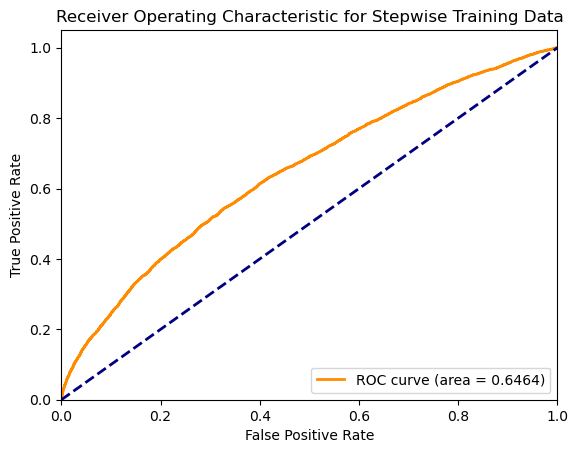

In [32]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

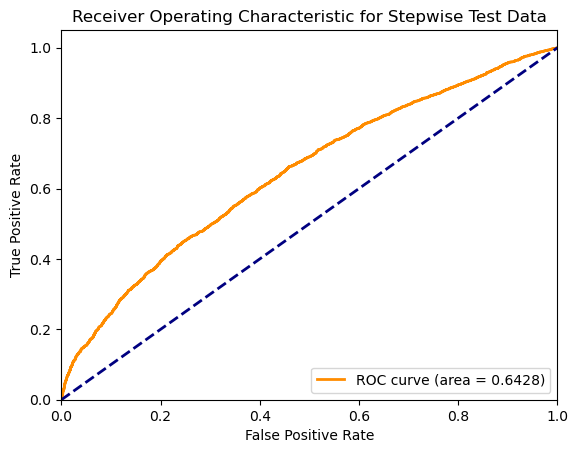

In [33]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()

In [34]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")

Accuracy (Train) : 0.6109
Precision (Train): 0.6382
Recall (Train)  : 0.4040

Accuracy (Test) : 0.6116
Precision (Test): 0.6286
Recall (Test)  : 0.4100



#### sklearn implementation with L1 and L2 Regularization (LASSO, Ridge Regression, Elastic Net)

In [35]:
# split the data into training and testing sets
X3 = df.drop(['readmitted'], axis=1)
X3=df[['n_lab_procedures', 'n_procedures','n_medications','n_outpatient', 'n_inpatient','n_emergency','diag_1','age','glucose_test','A1Ctest','change', 'diabetes_med']]
X3 = pd.get_dummies(X3, columns=['age', 'diag_1', 'glucose_test','A1Ctest','change', 'diabetes_med'], drop_first=True, dtype='float')

y3 = df['readmitted']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4913 to 23654
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n_lab_procedures        17500 non-null  int64  
 1   n_procedures            17500 non-null  int64  
 2   n_medications           17500 non-null  int64  
 3   n_outpatient            17500 non-null  int64  
 4   n_inpatient             17500 non-null  int64  
 5   n_emergency             17500 non-null  int64  
 6   age_[50-60)             17500 non-null  float64
 7   age_[60-70)             17500 non-null  float64
 8   age_[70-80)             17500 non-null  float64
 9   age_[80-90)             17500 non-null  float64
 10  age_[90-100)            17500 non-null  float64
 11  diag_1_Diabetes         17500 non-null  float64
 12  diag_1_Digestive        17500 non-null  float64
 13  diag_1_Injury           17500 non-null  float64
 14  diag_1_Missing          17500 non-null  

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)




LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [37]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                   feature  coefficient  abs_coefficient
4              n_inpatient       0.3801           0.3801
23          diabetes_med_1       0.2307           0.2307
9              age_[80-90)       0.2163           0.2163
5              n_emergency       0.2149           0.2149
15  diag_1_Musculoskeletal      -0.1795           0.1795
16            diag_1_Other      -0.1767           0.1767
13           diag_1_Injury      -0.1681           0.1681
8              age_[70-80)       0.1535           0.1535
7              age_[60-70)       0.1316           0.1316
3             n_outpatient       0.1218           0.1218
21          A1Ctest_normal      -0.1184           0.1184
11         diag_1_Diabetes       0.0653           0.0653
12        diag_1_Digestive      -0.0449           0.0449
20              A1Ctest_no       0.0423           0.0423
1             n_procedures      -0.0409           0.0409
17      diag_1_Respiratory      -0.0396           0.0396
22                change_1     

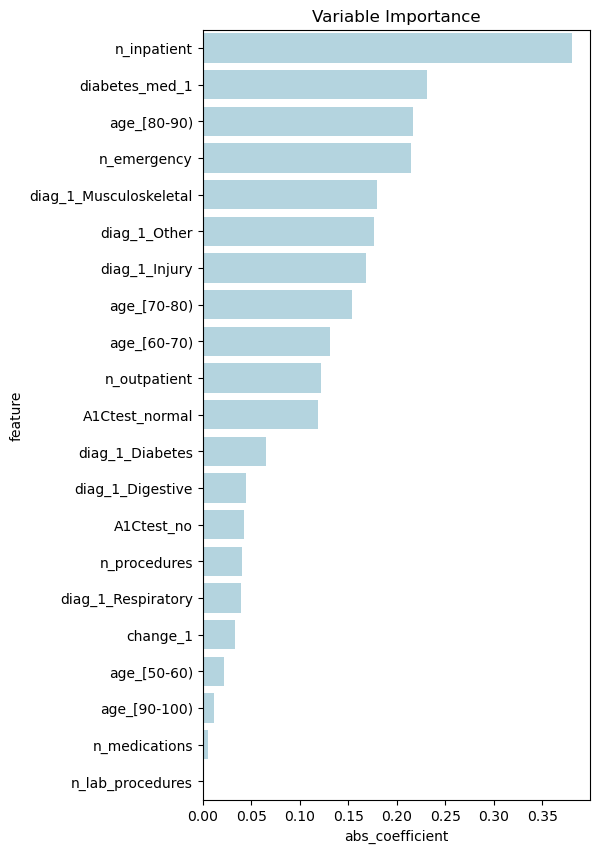

-- rejected --
 diag_1_Missing
 glucose_test_no
 glucose_test_normal


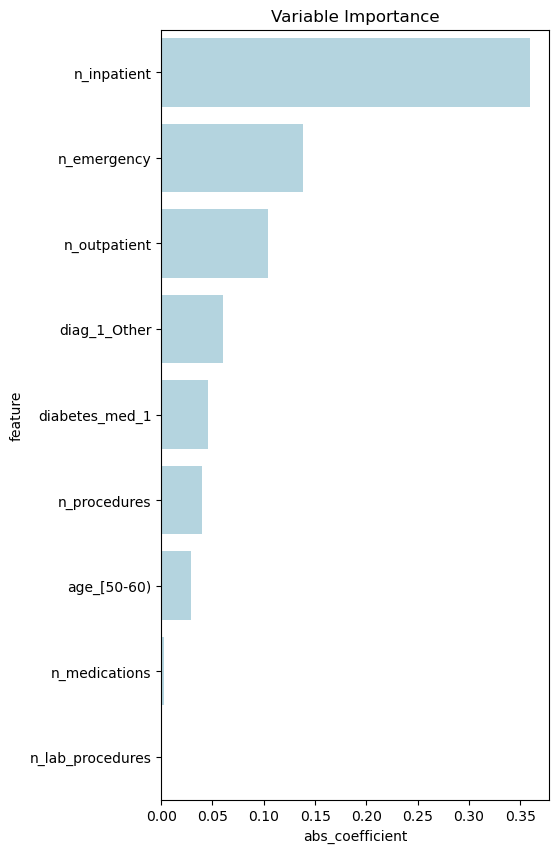

-- rejected --
 age_[80-90)
 age_[90-100)
 diag_1_Diabetes
 age_[70-80)
 diag_1_Injury
 diag_1_Missing
 diag_1_Musculoskeletal
 age_[60-70)
 diag_1_Respiratory
 glucose_test_no
 glucose_test_normal
 A1Ctest_no
 A1Ctest_normal
 change_1
 diag_1_Digestive


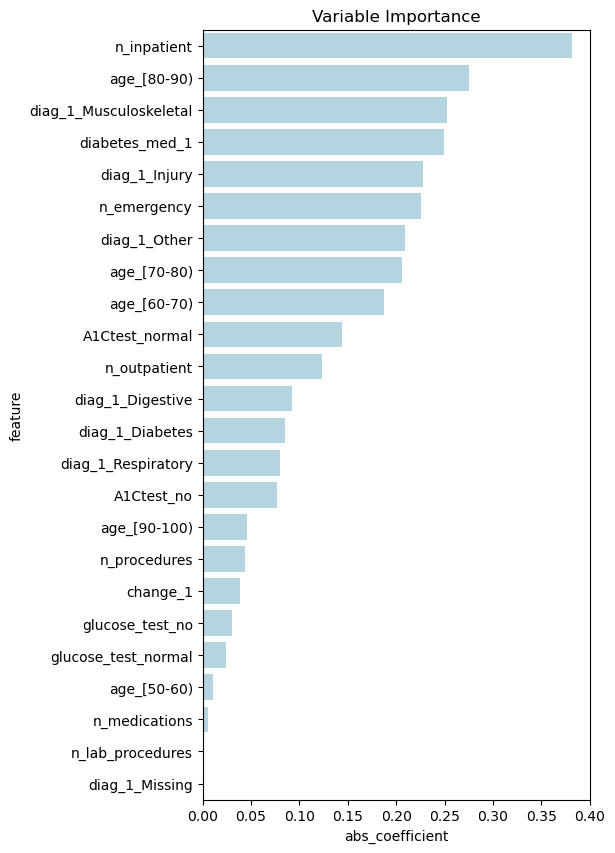

-- rejected --


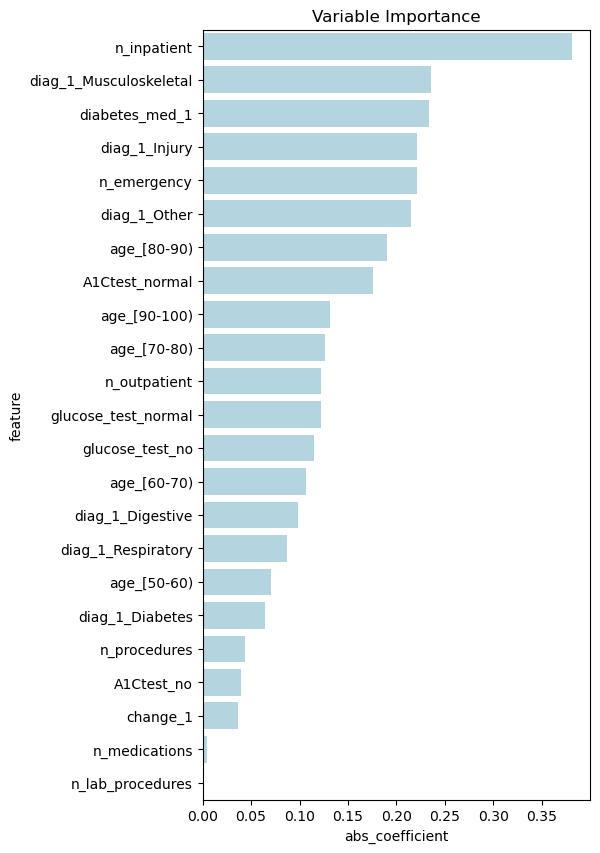

-- rejected --
 diag_1_Missing


In [38]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

#### Make Predictions on the training and testing data for each model

In [39]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)

#### Calculate Accuracy, Precision, Recall for each model on training and test set

In [40]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y3_train, y_pred_train)
prec_train2 = precision_score(y3_train, y_pred_train)
rec_train2 = recall_score(y3_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train2))
print("Precision: {:.4f}".format(prec_train2))
print("Recall.  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y3_test, y_pred_test)
prec_test2 = precision_score(y3_test, y_pred_test)
rec_test2 = recall_score(y3_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test2))
print("Precision: {:.4f}".format(prec_test2))
print("Recall.  : {:.4f}".format(rec_test2))

 -- train set -- 
Accuracy : 0.6114
Precision: 0.6404
Recall.  : 0.4015

 -- test set -- 
Accuracy : 0.6109
Precision: 0.6297
Recall.  : 0.4037


#### L2 regularization

In [41]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.6110
Precision: 0.6385
Recall.  : 0.4039
AUC      : 0.6465

 -- test set -- 
Accuracy : 0.6115
Precision: 0.6283
Recall.  : 0.4100
AUC      : 0.6430


#### Elastic Net

In [42]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.6114
Precision: 0.6394
Recall.  : 0.4037
AUC      : 0.6460

 -- test set -- 
Accuracy : 0.6116
Precision: 0.6299
Recall.  : 0.4066
AUC      : 0.6441


### 2.2 Decision Tree

In [43]:
# split the data into training and testing sets
X = data_encoded.drop(['readmitted'], axis=1)
data_encoded['readmitted'] = data_encoded['readmitted'].astype('category')
y = data_encoded['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4913 to 23654
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   time_in_hospital        17500 non-null  int64
 1   n_lab_procedures        17500 non-null  int64
 2   n_procedures            17500 non-null  int64
 3   n_medications           17500 non-null  int64
 4   n_outpatient            17500 non-null  int64
 5   n_inpatient             17500 non-null  int64
 6   n_emergency             17500 non-null  int64
 7   change                  17500 non-null  int64
 8   diabetes_med            17500 non-null  int64
 9   age_[40-50)             17500 non-null  int64
 10  age_[50-60)             17500 non-null  int64
 11  age_[60-70)             17500 non-null  int64
 12  age_[70-80)             17500 non-null  int64
 13  age_[80-90)             17500 non-null  int64
 14  age_[90-100)            17500 non-null  int64
 15  diag_1_Circulatory   

In [44]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)


DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [46]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [47]:
# calculate the accuracy, precision, and recall scores
acc_train3 = accuracy_score(y_train, y_pred_train)
prec_train3 = precision_score(y_train, y_pred_train)
rec_train3 = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train3))
print("Precision: {:.4f}".format(prec_train3))
print("Recall.  : {:.4f}".format(rec_train3))
print("")

# calculate the accuracy, precision, and recall scores
acc_test3 = accuracy_score(y_test, y_pred_test)
prec_test3 = precision_score(y_test, y_pred_test)
rec_test3 = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test3))
print("Precision: {:.4f}".format(prec_test3))
print("Recall.  : {:.4f}".format(rec_test3))

 -- train set -- 
Accuracy : 0.6149
Precision: 0.6175
Recall.  : 0.4824

 -- test set -- 
Accuracy : 0.6101
Precision: 0.6018
Recall.  : 0.4863


In [48]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[6779 4272]
 [2467 3982]]
[[2874 1798]
 [1126 1702]]


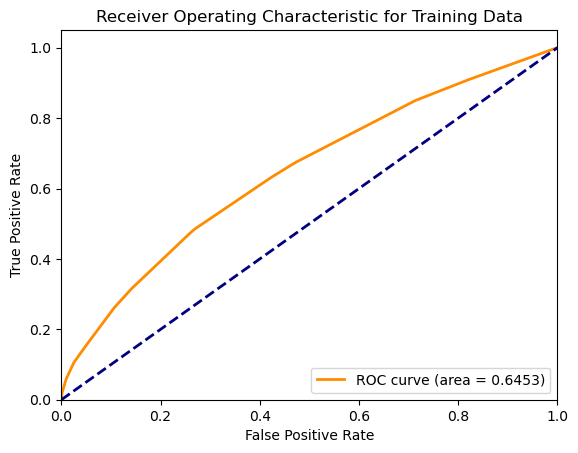

In [49]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

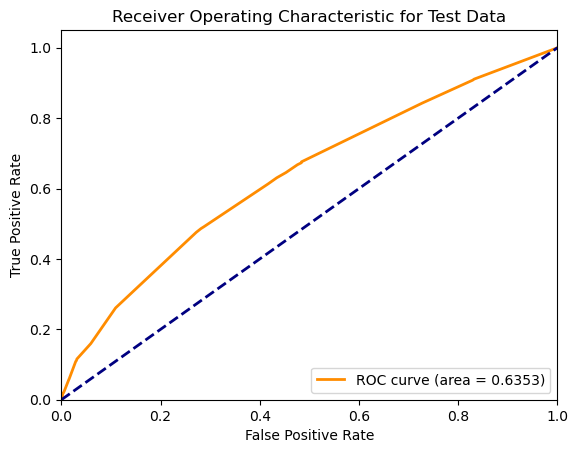

In [50]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


    importance                 feature
5     0.703565             n_inpatient
4     0.099286            n_outpatient
8     0.042836            diabetes_med
6     0.033709             n_emergency
2     0.033285            n_procedures
0     0.021574        time_in_hospital
3     0.021351           n_medications
1     0.015415        n_lab_procedures
13    0.011466             age_[80-90)
16    0.008422         diag_1_Diabetes
21    0.004678            diag_1_Other
9     0.004413             age_[40-50)
25    0.000000     glucose_test_normal
24    0.000000         glucose_test_no
26    0.000000            A1Ctest_high
20    0.000000  diag_1_Musculoskeletal
23    0.000000       glucose_test_high
27    0.000000              A1Ctest_no
22    0.000000      diag_1_Respiratory
14    0.000000            age_[90-100)
19    0.000000          diag_1_Missing
18    0.000000           diag_1_Injury
17    0.000000        diag_1_Digestive
15    0.000000      diag_1_Circulatory
12    0.000000           

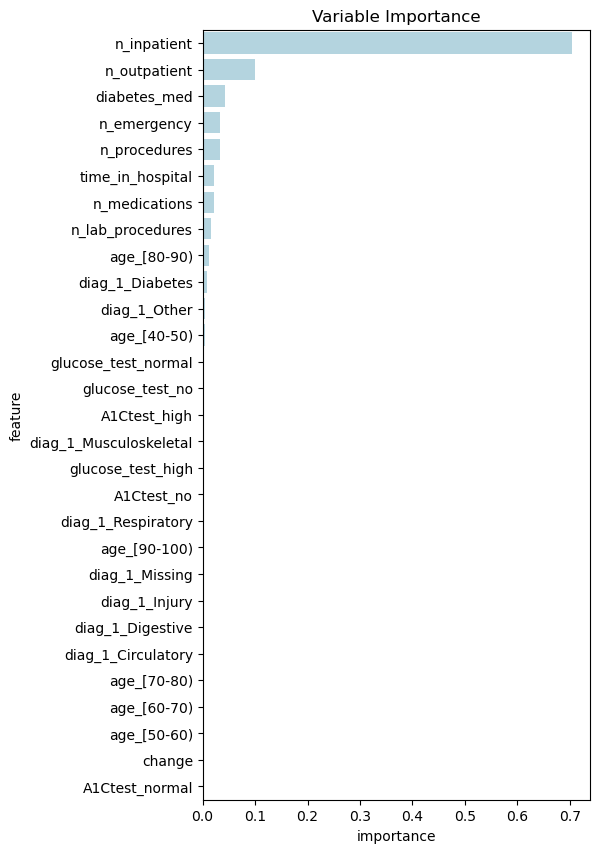

In [51]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [52]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100,150,200,250,300],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 100}
DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=100)


In [53]:
# create an instance of a decision tree classifier using default values

dt2 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=100, ccp_alpha = 0)

# fit the model to the training data
dt2.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# visualize the decision tree
dot_data2 = export_graphviz(dt2, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph2 = graphviz.Source(dot_data2)
graph2.render("decision_tree")

In [ ]:
export_graphviz(dt2,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img2 = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img2)

In [54]:
# make predictions on the training and test data
y_pred_train2 = dt2.predict(X_train)
y_pred_test2 = dt2.predict(X_test)

y_prob_train2 = dt2.predict_proba(X_train)
y_prob_test2 = dt2.predict_proba(X_test)

In [55]:
# calculate the accuracy, precision, and recall scores
acc_train4 = accuracy_score(y_train, y_pred_train2)
prec_train4 = precision_score(y_train, y_pred_train2)
rec_train4 = recall_score(y_train, y_pred_train2)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train4))
print("Precision: {:.4f}".format(prec_train4))
print("Recall.  : {:.4f}".format(rec_train4))
print("")

# calculate the accuracy, precision, and recall scores
acc_test4 = accuracy_score(y_test, y_pred_test2)
prec_test4 = precision_score(y_test, y_pred_test2)
rec_test4 = recall_score(y_test, y_pred_test2)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test4))
print("Precision: {:.4f}".format(prec_test4))
print("Recall.  : {:.4f}".format(rec_test4))

 -- train set -- 
Accuracy : 0.6129
Precision: 0.6169
Recall.  : 0.4732

 -- test set -- 
Accuracy : 0.6113
Precision: 0.6055
Recall.  : 0.4797


In [56]:
# confusion matrix
conf_matrix2 = confusion_matrix(y_pred_train2, y_train)
print(conf_matrix2)

# Generate confusion matrix for test set
conf_matrix2 = confusion_matrix(y_pred_test2, y_test)
print(conf_matrix2)

[[6820 4348]
 [2426 3906]]
[[2906 1821]
 [1094 1679]]


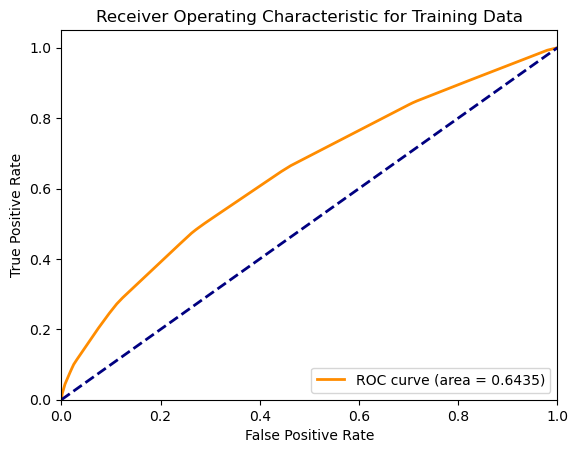

In [57]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train2[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train2[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

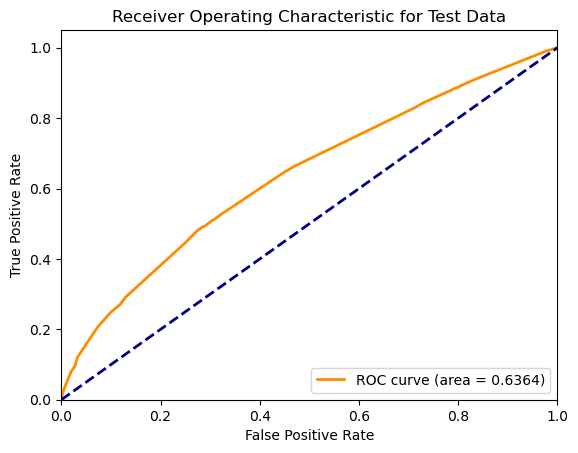

In [58]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test2[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test2[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

    importance                 feature
5     0.703565             n_inpatient
4     0.099286            n_outpatient
8     0.042836            diabetes_med
6     0.033709             n_emergency
2     0.033285            n_procedures
0     0.021574        time_in_hospital
3     0.021351           n_medications
1     0.015415        n_lab_procedures
13    0.011466             age_[80-90)
16    0.008422         diag_1_Diabetes
21    0.004678            diag_1_Other
9     0.004413             age_[40-50)
25    0.000000     glucose_test_normal
24    0.000000         glucose_test_no
26    0.000000            A1Ctest_high
20    0.000000  diag_1_Musculoskeletal
23    0.000000       glucose_test_high
27    0.000000              A1Ctest_no
22    0.000000      diag_1_Respiratory
14    0.000000            age_[90-100)
19    0.000000          diag_1_Missing
18    0.000000           diag_1_Injury
17    0.000000        diag_1_Digestive
15    0.000000      diag_1_Circulatory
12    0.000000           

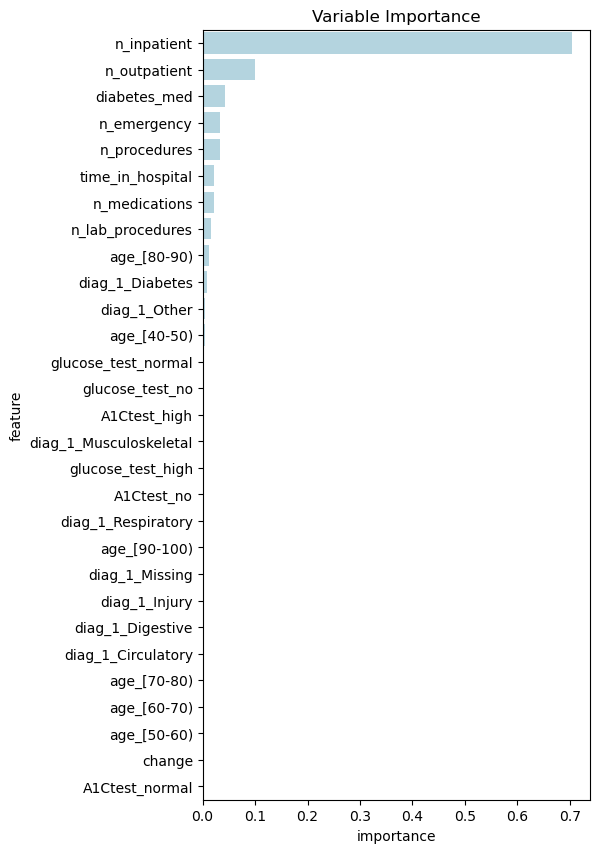

In [59]:
#calculate feature importance
tree_imp2 = dt2.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [62]:
### 3. Model Selection

In [60]:

results = [
    {"Model": "Basic Logistic Regression",
     "Train Accuracy": acc_train1, "Train Precision": prec_train1, "Train Recall": rec_train1, "Train AUC": 0.6464,
     "Test Accuracy": acc_test1, "Test Precision": prec_test1, "Test Recall": rec_test1, "Test AUC": 0.6428},
    
    {"Model": "Tuned Logistic Regression",
     "Train Accuracy": acc_train2, "Train Precision": prec_train2, "Train Recall": rec_train2, "Train AUC": 0.6464,
     "Test Accuracy": acc_test2, "Test Precision": prec_test2, "Test Recall": rec_test2, "Test AUC": 0.6428},
    
     {"Model": "Basic Tree: Maxdepth=, Minleaf=",
     "Train Accuracy": acc_train3, "Train Precision": prec_train3, "Train Recall": rec_train3, "Train AUC": 0.6453,
     "Test Accuracy": acc_test3, "Test Precision": prec_test3, "Test Recall": rec_test3, "Test AUC": 0.6353},
    
     {"Model": "Tuned Tree: Maxdepth=5, Minleaf=100",
     "Train Accuracy": acc_train4, "Train Precision": prec_train4, "Train Recall": rec_train4, "Train AUC": 0.6435,
     "Test Accuracy": acc_test4, "Test Precision": prec_test4, "Test Recall": rec_test4, "Test AUC": 0.6364},

]

df_results = pd.DataFrame(results)

df_results = df_results.round(4)

In [61]:
df_results

,Model,Train Accuracy,Train Precision,Train Recall,Train AUC,Test Accuracy,Test Precision,Test Recall,Test AUC
0,Basic Logistic Regression,0.6109,0.6382,0.4040,0.6464,0.6116,0.6286,0.4100,0.6428
1,Tuned Logistic Regression,0.6114,0.6404,0.4015,0.6464,0.6109,0.6297,0.4037,0.6428
2,"Basic Tree: Maxdepth=, Minleaf=",0.6149,0.6175,0.4824,0.6453,0.6101,0.6018,0.4863,0.6353
3,"Tuned Tree: Maxdepth=5, Minleaf=100",0.6129,0.6169,0.4732,0.6435,0.6113,0.6055,0.4797,0.6364
